# The Socrata API

## Lecture objectives

1. Demonstrate the Socrata API
2. Provide more practice with `pandas`, `geopandas`, and plotting

### Socrata
Many cities, other government agencies, and nonprofit organizations make their data available through the Socrata API. The City of Los Angeles is one user. [You can browse the city's datasets here](https://data.lacity.org).

Just like the census, you can call Socrata APIs with `requests`, but there is also a dedicated package, `sodapy`.

[Look at the housing dataset here](https://data.lacity.org/Housing-and-Real-Estate/HCIDLA-Affordable-Housing-Projects-List-2003-to-Pr/mymu-zi3s). Click on the API button in the top right corner. You can see much useful information:

* The URL (the API endpoint)
* The format (JSON is the default)
* Some helpful links

Let's copy and paste the API endpoint, and use `requests`. 

In [1]:
import requests
import pandas as pd
import json

url = 'https://data.lacity.org/resource/mymu-zi3s.json'
r = requests.get(url)
df = pd.DataFrame(json.loads(r.text))
df.head()

,apn,project_number,name,development_stage,construction_type,address,council_district,site_cd,community,site_units,...,latitude,geocoded_column,:@computed_region_k96s_3jcv,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,:@computed_region_kqwf_mjcx,:@computed_region_2dna_qi2s,:@computed_region_qz3q_ghft,jobs,contract_numbers
0,5143020023,02-118256,SAN LUCAS APARTMENTS,In-Service,NEW CONSTRUCTION,"1221 W 7TH ST Los Angeles, CA 90017",1,1,WESTLAKE,196,...,34.05235,"{'type': 'Point', 'coordinates': [-118.26584, ...",564,1047,54,11,76,23078,NaN,NaN
1,5525004023,18-125504,POINTE ON LA BREA,In-Service,NEW CONSTRUCTION,"849 N LA BREA AVE LOS ANGELES, CA 90038",5,1,MELROSE,50,...,34.0866,"{'type': 'Point', 'coordinates': [-118.34432, ...",446,805,NaN,6,26,23677,218,C-139292
2,5050011005,05-117193,LEEWARD APTS. (SITE 7),In-Service,REHAB,"2809 S WEST BLVD Los Angeles, CA 90016",10,7,CRENSHAW DISTRICT,0,...,34.03071,"{'type': 'Point', 'coordinates': [-118.34182, ...",668,925,7,12,17,23077,NaN,NaN
3,5094010001,20-127589,HHH NEW HAMPSHIRE,Development,NEW CONSTRUCTION,"701 S NEW HAMPSHIRE AVE Los Angeles, CA 90005",10,1,KOREATOWN,95,...,34.05963,"{'type': 'Point', 'coordinates': [-118.29335, ...",602,684,NaN,12,89,22722,NaN,NaN
4,5114014020,14-121652,FLORENCE MILLS (SITE 5),In-Service,NEW CONSTRUCTION,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",9,5,CENTRAL,0,...,34.01115,"{'type': 'Point', 'coordinates': [-118.2574, 3...",712,892,7,13,6,22727,226,C-129358


We might have expected some geographic coordinates, and it looks like they are in the `geocoded_column` column.

We converted it to a regular `pandas` DataFrame, which doesn't understand spatial relationships. So how do we make the geometries readily available?

Looking back at the [webpage](https://data.lacity.org/Housing-and-Real-Estate/HCIDLA-Affordable-Housing-Projects-List-2003-to-Pr/mymu-zi3s), the API also gives us a `geojson` option. How do we make use of this? Fortunately, the `geopandas.read_file()` function can read in the URL directly, without going through `requests`.

Let's read the dataset into a `geoDataFrame` and call it `gdf`. Note that it gives us a `geometry` column with point locations.

In [2]:
import geopandas as gpd
url = 'https://data.lacity.org/resource/mymu-zi3s.geojson'
gdf = gpd.read_file(url)
gdf.head()

,site_units,tax_exempt_conduit_bond,community,development_stage,name,leverage,latitude,photo,project_number,developer,...,contract_numbers,address,apn,project_total_units,housing_type,management_company,supportive_housing,council_district,tdc,geometry
0,196,0,WESTLAKE,In-Service,SAN LUCAS APARTMENTS,0,34.05235,"{ ""url"": ""http:\/\/hcidapp.lacity.org\/mpphoto...",02-118256,N/A,...,None,"1221 W 7TH ST Los Angeles, CA 90017",5143020023,196,SENIORS,CIRRUS ASSET MANAGEMENT,No,1,0,POINT (-118.26584 34.05235)
1,50,5002500,MELROSE,In-Service,POINTE ON LA BREA,21890292,34.0866,"{ ""url"": ""http:\/\/hcidapp.lacity.org\/mpphoto...",18-125504,EAH Inc,...,C-139292,"849 N LA BREA AVE LOS ANGELES, CA 90038",5525004023,50,SPECIAL NEEDS,EAH INC,Yes,5,34460478,POINT (-118.34432 34.0866)
2,0,10208936,CRENSHAW DISTRICT,In-Service,LEEWARD APTS. (SITE 7),7103994,34.03071,"{ ""url"": ""http:\/\/hcidapp.lacity.org\/mpphoto...",05-117193,"HAMPSTEAD PARTNERS, INC.",...,None,"2809 S WEST BLVD Los Angeles, CA 90016",5050011005,257,FAMILY,"ALPHA PROPERTY MANAGEMENT, INC.",No,10,17312930,POINT (-118.34182 34.03071)
3,95,0,KOREATOWN,Development,HHH NEW HAMPSHIRE,0,34.05963,"{ ""url"": ""http:\/\/hcidapp.lacity.org\/mpphoto...",20-127589,BRIDGE Housing Corporation,...,None,"701 S NEW HAMPSHIRE AVE Los Angeles, CA 90005",5094010001,95,SPECIAL NEEDS,N/A,Yes,10,0,POINT (-118.29335 34.05963)
4,0,0,CENTRAL,In-Service,FLORENCE MILLS (SITE 5),36081992,34.01115,"{ ""url"": ""http:\/\/hcidapp.lacity.org\/mpphoto...",14-121652,Hollywood Community Housing Corporation,...,C-129358,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",5114014020,74,SPECIAL NEEDS,HOLLYWOOD COMMUNITY HOUSING,Yes,9,45471107.63,POINT (-118.2574 34.01115)


We can check to see what projection it is in using the `crs` attribute. Then, we can plot the data.

In [3]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Matplotlib is building the font cache; this may take a moment.


<Axes: >

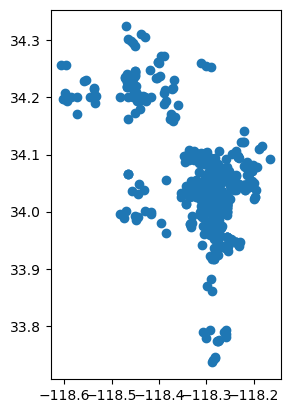

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gdf.plot(ax=ax)

Before we clean up the map, let's mention two other ways to read that data in, rather than using the Socrata API.

#### Sodapy

We won't cover the [`sodapy` library](https://pypi.org/project/sodapy/) here, but it can be simpler for some types of dataset. Note that it is no longer maintained as of August 2022.

#### Save to disk
You can always point and click on the webpage, download the file to your computer, and load it in.

Socrata gives you [various options for the format for this file](https://data.lacity.org/Housing-and-Real-Estate/HCIDLA-Affordable-Housing-Projects-List-2003-to-Pr/mymu-zi3s): `csv`, `shp`, and so on. Let's use the shapefile version.

Download the file; you will probably need to unzip it and change the filename in the next cell.

In [6]:
# change this to whereever you download files on your computer
download_path = '/Users/Tomo/Desktop/UP213/Week1/'
# change this to the name of the directory that you downloaded
lahd = 'LAHD Affordable Housing Projects List (2003 to Present)_20250402'
gpd.read_file(download_path+lahd)

,apn,project_nu,name,developmen,constructi,address,council_di,site_cd,community,site_units,...,management,contact_ph,photo,jobs,reporturl2,contract_n,date_stamp,longitude,latitude,geometry
0,5.143020e+09,02-118256,SAN LUCAS APARTMENTS,In-Service,NEW CONSTRUCTION,"1221 W 7TH ST Los Angeles, CA 90017",1.0,1.0,WESTLAKE,196.0,...,CIRRUS ASSET MANAGEMENT,(818) 222-4840,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,None,2025-02-06T00:00:00.000,-118.26584,34.05235,POINT (-118.26584 34.05235)
1,5.525004e+09,18-125504,POINTE ON LA BREA,In-Service,NEW CONSTRUCTION,"849 N LA BREA AVE LOS ANGELES, CA 90038",5.0,1.0,MELROSE,50.0,...,EAH INC,(951) 966-1351,click here (http://hcidapp.lacity.org/mpphotos...,218.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-139292,2025-02-06T00:00:00.000,-118.34432,34.08660,POINT (-118.34432 34.0866)
2,5.050011e+09,05-117193,LEEWARD APTS. (SITE 7),In-Service,REHAB,"2809 S WEST BLVD Los Angeles, CA 90016",10.0,7.0,CRENSHAW DISTRICT,0.0,...,"ALPHA PROPERTY MANAGEMENT, INC.",(323) 231-4174,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,None,2025-02-06T00:00:00.000,-118.34182,34.03071,POINT (-118.34182 34.03071)
3,5.094010e+09,20-127589,HHH NEW HAMPSHIRE,Development,NEW CONSTRUCTION,"701 S NEW HAMPSHIRE AVE Los Angeles, CA 90005",10.0,1.0,KOREATOWN,95.0,...,N/A,N/A,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,None,2025-02-06T00:00:00.000,-118.29335,34.05963,POINT (-118.29335 34.05963)
4,5.114014e+09,14-121652,FLORENCE MILLS (SITE 5),In-Service,NEW CONSTRUCTION,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",9.0,5.0,CENTRAL,0.0,...,HOLLYWOOD COMMUNITY HOUSING,(323) 454-6209,click here (http://hcidapp.lacity.org/mpphotos...,226.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-129358,2025-02-06T00:00:00.000,-118.25740,34.01115,POINT (-118.2574 34.01115)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,5.101030e+09,18-125517,MAIN STREET APARTMENTS,In-Service,NEW CONSTRUCTION,"5501 S MAIN ST Los Angeles, CA 90037",9.0,1.0,SOUTH PARK,57.0,...,WSH MANAGEMENT,(323) 433-3676,click here (http://hcidapp.lacity.org/mpphotos...,315.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-138434,2025-02-06T00:00:00.000,-118.27420,33.99209,POINT (-118.2742 33.99209)
597,5.149011e+09,18-124964,GRAND AVENUE PARCEL Q APTS.,In-Service,DEMO/NEW CONSTRUCTION,"100 S GRAND AVE Los Angeles, CA 90012",14.0,1.0,DOWNTOWN,323.0,...,N/A,N/A,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,None,2025-02-06T00:00:00.000,-118.24841,34.05451,POINT (-118.24841 34.05451)
598,5.114014e+09,14-121652,FLORENCE MILLS (SITE 4),In-Service,NEW CONSTRUCTION,"3509 S CENTRAL AVE LOS ANGELES, CA 90011",9.0,4.0,CENTRAL,0.0,...,HOLLYWOOD COMMUNITY HOUSING,(323) 454-6209,click here (http://hcidapp.lacity.org/mpphotos...,226.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-129358,2025-02-06T00:00:00.000,-118.25670,34.01140,POINT (-118.2567 34.0114)
599,5.183005e+09,09-117211,LAS MARGARITAS (SITE 2),In-Service,BOTH REHAB AND NEW CONSTRUCTION,"115 N SOTO ST Los Angeles, CA 90033",14.0,2.0,BOYLE HEIGHTS,0.0,...,THE JOHN STEWART COMPANY,(213) 878-2716,click here (http://hcidapp.lacity.org/mpphotos...,121.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-117254,2025-02-06T00:00:00.000,-118.20967,34.04422,POINT (-118.20967 34.04422)


Now let's clean up the map. First, note that we can call `gdf.plot()` directly, but we have more flexibility if we create our own figure and axis object using `plt.subplots()`.

Let's also plot the data in a particular column, perhaps `site_units`, as a proportional circle.

And finally, let's use `contextily` to provide a basemap.

[]

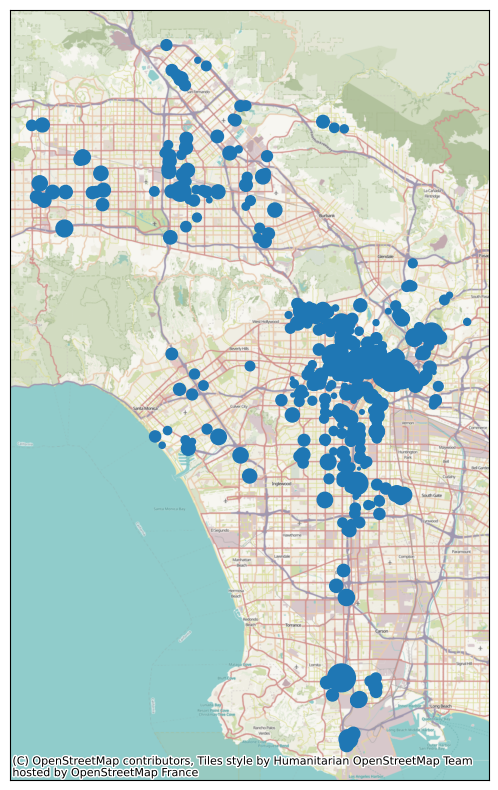

In [7]:
import matplotlib.pyplot as plt
import contextily as ctx
# If we try to plot site_units, we get an error due to the zero-unit entries. Let's solve that first.
gdf['site_units'] = gdf.site_units.astype(int)  # convert to integer

fig, ax = plt.subplots(figsize=(10,10))

# basemaps are typically in Web Mercator (projection 3857)
# so we need to reproject our dataframe to this
gdf[gdf.site_units>0].to_crs('EPSG:3857').plot(markersize='site_units', ax=ax)

# let's add a basemap using the contextily library. The zoom was trial and error
ctx.add_basemap(ax, zoom=12)

# and we really don't need the axis ticks and labels, so we set them to an empty list
# take a look and see what happens when you comment out these lines
ax.set_xticks([])
ax.set_yticks([])

<div class="alert alert-block alert-info">
<h3>Key Takeaways</h3>
<ul>
  <li>Government open data sites often use Socrata.</li>
  <li>The data format is usually well documented, and there are several options to import it to Python.</li>
  <li>When importing geospatial data, pay attention to the projection.</li>
</ul>
</div>